# Notebook; session 2, week 2

In [1]:
import math
import pandas
import numpy as np
import seaborn as sns;
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import special
from sklearn.metrics import confusion_matrix
from ipywidgets import interact,FloatSlider

# 1) Bayes' Theorem

Recall, that for real variables $x$ and labels $C_k = 1,...c$, Bayes' theorem gives:

$P(C_k|x) = \dfrac{p(x|C_k)P(C_k)}{p(x)}  = \dfrac{p(x|C_k)P(C_k)}{\sum_j p(x|C_j)P(C_j)}$

In this exercise session we will illustrate Bayes' theorem, by letting the class-conditional distributions be univariate normals with individual parameter sets. 

We define three univariate normal distributions $p_1, p_2, p_3$ to represent the three possible classes
 $C_1,C_2$ and $C_3$. The prior probabilities of the three classes are given by $P(C_1), P(C_2), P(C_3)$.
 
 ### Questions
  
$\star$ Compute and plot the resulting density $p(x)$.

$\star$ Compute and plot the posterior probabilities $P(C_1|x), P(C_2|x), P(C_3|x)$ in the same figure.




In [2]:
#Define data structures for the means, variances and standard deviations
means = [-2, 0, 2];
variances = [1, 1, 1];
sigmas = np.sqrt(variances);

#Define priors
P_c1 = 0.4
P_c2 = 0.3
P_c3 = 1 - (P_c1 + P_c2)

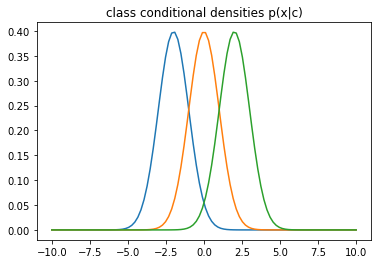

In [3]:
#Plot densities P(x|c)

x = np.linspace(-10,10, 100)
px_c1 = norm.pdf(x,means[0],sigmas[0]);
px_c2 = norm.pdf(x,means[1],sigmas[1]);
px_c3 = norm.pdf(x,means[2],sigmas[2]);

plt.title('class conditional densities p(x|c)')
plt.plot(x, px_c1)
plt.plot(x, px_c2)
plt.plot(x, px_c3)
plt.show()

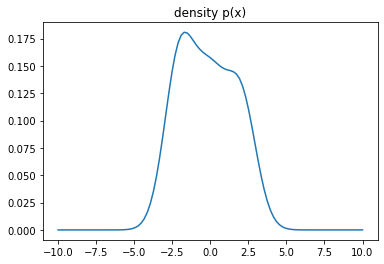

In [11]:
#compute and plot the density p(x)

px = P_c1 * px_c1 + P_c2 * px_c2 + P_c3 * px_c3

plt.title('density p(x)')
plt.plot(x, px)
plt.show()

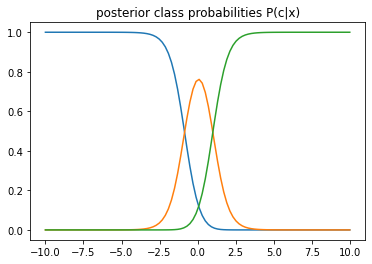

In [12]:
#compute and plot posterior P(C|x)
P1x = (P_c1 * px_c1)/px
P2x = (P_c2 * px_c2)/px
P3x = (P_c3 * px_c3)/px

plt.title('posterior class probabilities P(c|x)')
plt.plot(x,P1x)
plt.plot(x,P2x)
plt.plot(x,P3x)
plt.show()

# 2) Simulate samples from the class conditional distribution

In this exercise you will use a simulator that randomly draw samples from multiple normal distributions. We still consider the same three-class situation (with the same means, variances and priors as in the previous exercise).

Sampling from the class conditional distribution $p(x)$ can be simulated by a generative process with two steps. 
First: The class of the sample is determined randomly based on the prior probability for each class. Second: The value of the sample is determined by a random draw from the normal distribution associated with the selected sample class.

### Questions
$\star$ Draw 100,000 samples using the function and plot the histogram of the sample values in the same plot as the density $p(x)$.

In [13]:
#define function to simulate draws from the class conditional distribution
def drawsample():        
    randomdraw = np.random.choice(3, 1, p=[P_c1,P_c2,P_c3])[0]
    sampleClass = randomdraw+1;
    sampleValue = np.random.normal(loc = means[randomdraw], scale = sigmas[randomdraw]);    
    return sampleClass, sampleValue

In [20]:
#draw samples from the distribution
N = 100000;
samples = np.zeros(N);
actualclass = np.zeros(N);

# make a for loop that generates samples of x and the class label for each i = 1, ..., N
# the values must be stored in the arrays: samples and actualclass, respectively.
for i in range(N):
    ch = np.random.randint(0,1)
    if ch <= P_c1:
        samples[i] = np.random.randint(-10,0)
        actualclass[i] = 1
    if ch >= 1 - P_c3:
        samples[i] = np.random.randint(-2.5,2.5)
        actualclass[i] = 3
    else:
        samples[i] = np.random.randint(0,10)
        actualclass[i] = 2
    
    
    
    


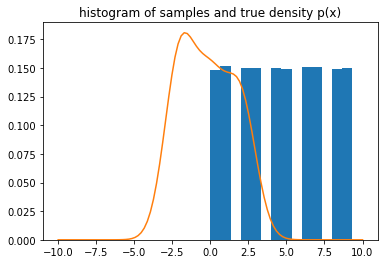

In [21]:
#plot histogram of samples together with the density p(x)
nbins = 30;
bin_borders = np.linspace(-10,10,nbins+1)
count, bins, ignored = plt.hist(samples, bin_borders, density = True);
plt.title('histogram of samples and true density p(x)')
plt.plot(x, px)
plt.show();


# 3) Decision boundaries
A decision rule, is a division of the space of $x$ so that each point is uniquely associated
with a single class $C_k$.
For instance, we can set up a 1D decision rule by dividing the space of $x$ into three intervals:
$I_1 =\; ] -\infty, d_1]\,, I_2 = \; ] d_1, d_2]\,, I_3 = \;] d_2, \infty [$.

The errors of a decision rule can be summarized by an error confusion matrix $R$.
In an experimental setting, the confusion matrix summarizes true class of the samples and what class they would have been assigned to according to the decision rule. We will display the confusion matrices, such that each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class.
An element $R_ij$ in the matrix hence shows how many samples of class $i$ were assigned to class $j$ according to the decision rule. 

### Questions

$\star$ Plot the following decision boundaries together with the posterior class probabilities.
- The decision boundaries are: $\quad d_1 = -3.8\;,\quad d_2 = 1$

$\star$ Use your simulator to draw 100,000 samples. Record both the sample values and sample classes ('actual class').  For each sample also record the 'predicted class'.
- hint: Store the records in arrays
- hint: Determine the predicted class from the sample value according to the decision boundaries.

$\star$ Explain and comment on the two matrices, computed by the code:
             
         CM = confusion_matrix(predictedclasses,actualclasses)
         CM_normalized = CM / CM.sum()
       
- hint: The matrices can be plottet as heat-maps using the code:          
        
        sns.heatmap(CM,xticklabels=['true1','true2','true3'],
                      yticklabels=['pred1','pred2','pred3'],
                      annot=True,cmap="Reds", fmt = 'd')
        plt.title('confusion matrix (counts)')
        plt.show()
        
        sns.heatmap(CM_normalized,xticklabels=['true1','true2','true3'],
                                  yticklabels=['pred1','pred2','pred3'],
                                  annot=True,cmap="Reds",fmt=".5f")
        plt.title('empirical confusion matrix')
        plt.show();
        



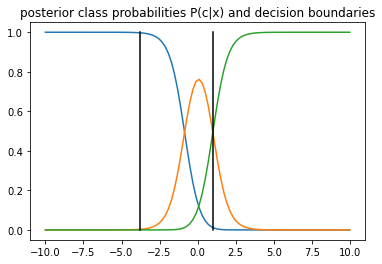

In [22]:
#define some simple decision boundaries
d_1to2 = -3.8;
d_2to3 = 1;

plt.title('posterior class probabilities P(c|x) and decision boundaries')
plt.plot(x,P1x)
plt.plot(x,P2x)
plt.plot(x,P3x)
plt.plot([d_1to2,d_1to2],[0,1],'k')
plt.plot([d_2to3,d_2to3],[0,1],'k')
plt.show()

In [23]:
#sample from the distribution using the simulator function
N = 100000;
samples = np.zeros(N);
actualclasses = np.zeros(N);
predictedclasses = np.zeros(N);

for i in range(N):
    sample_class, sample_value = drawsample();
    samples[i] = sample_value;
    actualclasses[i] = sample_class;
    #determine predicted class (according to decision boundaries)
    if sample_value < d_1to2:
        predictedclasses[i] = 1;
    elif sample_value < d_2to3:
        predictedclasses[i] = 2;
    else:
        predictedclasses[i] = 3;
        


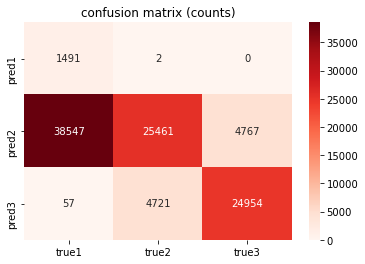

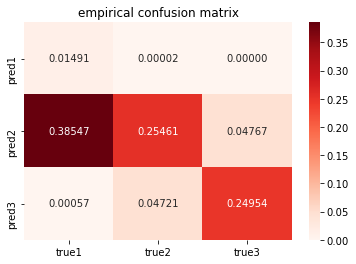

In [24]:
#compute and display confusion matrix
CM = confusion_matrix(predictedclasses,actualclasses)
sns.heatmap(CM,xticklabels=['true1','true2','true3'],yticklabels=['pred1','pred2','pred3'],annot=True,cmap="Reds", fmt = 'd')
plt.title('confusion matrix (counts)')
plt.show()

#normalize the confusion matrix
CM_normalized = CM / CM.sum()
plt.title('empirical confusion matrix')
sns.heatmap(CM_normalized,xticklabels=['true1','true2','true3'],yticklabels=['pred1','pred2','pred3'],annot=True,cmap="Reds",fmt=".5f")
plt.show();

# Decision process
Each element in the confusion matrix $R$ can be analytically computed as: $R_{jk} = \int_{I_j} p(x|C_k) dx$. 

The following function 'getConfusionMatrix' computes the confusion matrix with the two decision boundries d1 and d2 when the distributions have priors prior1, prior2 and prior3.

The last exercise is interactive. The interaction allows you to change the decision boundries and priors for the three distributions, and plots the corresponding confusion matrix.
- Comment on how the posterior class probability $P(c|x)$ and density $p(x)$ plot changes for different prior configurations. Note that the sum of the priors has to be 1, therefore the value of $P(C_1), P(C_2), P(C_3)$ that is printed is the normalized values.
- Can you create a situation in which a class has no points $x$ where it is most probable?
- Comment on how you can find an 'optimal' decision rule (by changing $d_1$ and $d_2$).




In [25]:
#function to compute confusion matrix
def getConfusionMatrix(d1, d2, prior1,prior2,prior3):
    
    #define means, variances and sigmas for the three normals
    means = [-2, 0, 2];
    variances = [1, 1, 1];
    sigmas = np.sqrt(variances);   
    
    #compute the confusion matrix for intervals: ]-inf, d1] , ]d1, d2] , ]d2,inf[
    R = np.array([np.zeros(3),np.zeros(3),np.zeros(3)])    
    R[0,0] = norm(means[0],sigmas[0]).cdf(d1)    
    R[0,1] = norm(means[1],sigmas[1]).cdf(d1)
    R[0,2] = norm(means[2],sigmas[2]).cdf(d1)    
    R[1,0] = norm(means[0],sigmas[0]).cdf(d2) - norm(means[0],sigmas[0]).cdf(d1)
    R[1,1] = norm(means[1],sigmas[1]).cdf(d2) - norm(means[1],sigmas[1]).cdf(d1)
    R[1,2] = norm(means[2],sigmas[2]).cdf(d2) - norm(means[2],sigmas[2]).cdf(d1)
    R[2,0] = 1-norm(means[0],sigmas[0]).cdf(d2)    
    R[2,1] = 1-norm(means[1],sigmas[1]).cdf(d2)
    R[2,2] = 1-norm(means[2],sigmas[2]).cdf(d2)        

    return R * np.array([prior1,prior2,prior3]);

#function to draw posterior class probabilites, decision boundaries and confusion matrix in same plot
def drawDecisionProcess(d1,d2,prior1,prior2,prior3):    
    
    means = [-2, 0, 2];
    variances = [1, 1, 1];
    sigmas = np.sqrt(variances);

    #normalize the priors (to sum to 1)
    prior_sum = prior1 + prior2 + prior3    
    prior1 = prior1/prior_sum;
    prior2 = prior2/prior_sum;
    prior3 = prior3/prior_sum;    
    print('P(C1) = ',prior1)
    print('P(C2) = ',prior2)
    print('P(C3) = ',prior3)
    
    x = np.linspace(-10,10, 100)
    px_c1 = norm.pdf(x,means[0],sigmas[0]);
    px_c2 = norm.pdf(x,means[1],sigmas[1]);
    px_c3 = norm.pdf(x,means[2],sigmas[2]);

    fig = plt.figure(num=None, figsize=(26, 12), dpi=80, facecolor='w', edgecolor='k')
    
    ax1 = fig.add_subplot(221) 
    ax1.plot(x, px_c1)
    ax1.plot(x, px_c2)
    ax1.plot(x, px_c3)
    ax1.set_title('class conditional densities p(x|c)')
    
    #plot P(c|x)
    px = px_c1 * prior1 + px_c2 * prior2 + px_c3 * prior3;
    P1x = px_c1*prior1/px;
    P2x = px_c2*prior2/px;
    P3x = px_c3*prior3/px;
    
    ax2 = fig.add_subplot(222)
    ax2.set_title('posterior class probabilities P(c|x)')
    ax2.plot(x,P1x)
    ax2.plot(x,P2x)
    ax2.plot(x,P3x)
    ax2.plot([d1,d1],[0,1],'k')
    ax2.plot([d2,d2],[0,1],'k')
    
    #plot p(x)
    ax3 = fig.add_subplot(223) 
    ax3.set_title('density p(x)')
    ax3.plot(x, px)
     
    #plot confusion matrix
    R = getConfusionMatrix(d1,d2,prior1,prior2,prior3);
    
    ax4 = fig.add_subplot(224) 
    
    sns.heatmap(R,xticklabels=['true1','true2','true3'],yticklabels=['pred1','pred2','pred3'],annot=True,fmt=".5f",cmap="Reds")
    ax4.set_title('confusion matrix')
    

In [26]:
interact(drawDecisionProcess, 
	d1=FloatSlider(min = -10.0, max = 0.0, value = -3.8, continuous_update=False),
	d2 = FloatSlider(min = 0.0, max = 10, value = 1.0, continuous_update = False),
	prior1 = FloatSlider(min = 0.0, max = 1, step = .01, value = 0.4, continuous_update = False),
	prior2 = FloatSlider(min = 0.0, max = 1, step = .01, value = 0.3, continuous_update = False),
	prior3 = FloatSlider(min = 0.0, max = 1, step = .01, value = 0.3, continuous_update = False),
);

interactive(children=(FloatSlider(value=-3.8, continuous_update=False, description='d1', max=0.0, min=-10.0), …